
### We have the big players like “Reliance Fresh”, “D-Mart”, “Big Bazaar” etc. and yet we have a lot of local/ regional players coming up as well. In relation to that we got access to yearly sales/footfall data of a national super mart company. Analyzing this data we are trying to answer some key questions

1.   Which city has the best sales for a supermarket store?
2.   Which city has the best footfall for a supermarket store?
3.   How does footfall affect sales?
4.   Are the sales cyclic/seasonal in nature?







# Section 1: Importing required libraries and Datasets



In [38]:
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

print ("Set up complete!")




Set up complete!


### Loading the data

In [39]:
sales_2015_path = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/2015_sales_data.csv'
sales_2016_path ='/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/2016_sales_data.csv'
sales_2017_path = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/2017_sales_data.csv'
sales_2018_path = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/2018_sales_data.csv'
city_dict_path =  open('/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/city_dict.json')
expected_discount_path = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/expected_discount.csv'
foot_fall = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/foot_fall.csv'
historical_discount = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/historical_discount.csv'
product_information = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/product_information.csv'
sample_submission = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/sample_submission.csv'
test_data = '/content/drive/MyDrive/Data Science Hackathon/Raw_data/Dataset/test_data.csv'

sales_2015 = pd.read_csv (sales_2015_path)
sales_2016 = pd.read_csv (sales_2016_path)
sales_2017 = pd.read_csv (sales_2017_path)
sales_2018 = pd.read_csv (sales_2018_path)
city_dict = json.load (city_dict_path)
expected_discount = pd.read_csv (expected_discount_path)
foot_fall = pd.read_csv (foot_fall)
historical_discount = pd.read_csv (historical_discount)
product_information = pd.read_csv (product_information)
sample_submission = pd.read_csv (sample_submission)
test_data = pd.read_csv (test_data)
test_data['date'] = pd.to_datetime(test_data['date'])

print("Data Load complete!")

Data Load complete!


# Section 2: Vizualising and Exploring the data

In [40]:
# Going through sales data
print("sales_2017")
print(sales_2017.head())
print("sales_2018")
print(sales_2018.head())

sales_2017
         date  city  product  sales
0  2017-01-02     1        1   28.0
1  2017-01-02     1        2   72.0
2  2017-01-02     1        3  128.0
3  2017-01-02     1        4   20.0
4  2017-01-02     1        5    4.0
sales_2018
         date  city  product  sales
0  2018-01-02     1     1292   48.0
1  2018-01-02     1        1   64.0
2  2018-01-02     1        2   48.0
3  2018-01-02     1        3  104.0
4  2018-01-02     1        4   16.0


In [41]:
#Going through sales data
print("2017 sales data null check")
print(sales_2017.isnull().sum())
print("2018 sales data null check")
print(sales_2018.isnull().sum())

2017 sales data null check
date       0
city       0
product    0
sales      0
dtype: int64
2018 sales data null check
date       0
city       0
product    0
sales      0
dtype: int64


In [42]:
# Appending 2017 and 2018 data
yearly_sales = sales_2017.append(sales_2018, ignore_index = True)
yearly_sales['date'] = pd.to_datetime(yearly_sales['date'])

yearly_sales.head()

,date,city,product,sales
0,2017-01-02,1,1,28.0
1,2017-01-02,1,2,72.0
2,2017-01-02,1,3,128.0
3,2017-01-02,1,4,20.0
4,2017-01-02,1,5,4.0


In [43]:
# Exploring city dataset
city = pd.DataFrame.from_dict(city_dict, orient='index', columns =['City'])
city['city_code']= city.index

city_name_code_dictionary = city.set_index("City").to_dict()
city

,City,city_code
4,Mumbai,4
5,Delhi,5
7,Bangalore,7
1,Kolkata,1
6,Chennai,6
8,Hyderabad,8
9,Ahmedabad,9
3,Jaipur,3
10,Lucknow,10
2,Other,2


In [44]:
city_name_code_dictionary = city.set_index("City").to_dict()
city_name_code_dictionary

{'city_code': {'Mumbai': '4',
  'Delhi': '5',
  'Bangalore': '7',
  'Kolkata': '1',
  'Chennai': '6',
  'Hyderabad': '8',
  'Ahmedabad': '9',
  'Jaipur': '3',
  'Lucknow': '10',
  'Other': '2'}}

In [45]:
# Exploring Discount datasets
print("expected_discount")
print(expected_discount.head())
print("historical_discount")
print(historical_discount.head())


expected_discount
         date  product  Discount_Ahmedabad  Discount_Bangalore  \
0  2018-05-01        2                 0.0                 1.0   
1  2018-05-01       30                 1.0                 1.0   
2  2018-05-01       31                 1.0                 1.0   
3  2018-05-01       32                 1.0                 1.0   
4  2018-05-01       33                 1.0                 1.0   

   Discount_Chennai  Discount_Delhi  Discount_Hyderabad  Discount_Jaipur  \
0               1.0             1.0                 0.0              0.0   
1               1.0             1.0                 1.0              1.0   
2               1.0             1.0                 1.0              1.0   
3               1.0             1.0                 1.0              1.0   
4               1.0             1.0                 1.0              1.0   

   Discount_Kolkata  Discount_Lucknow  Discount_Mumbai  Discount_Other  
0               1.0               1.0              1.0 

In [46]:
# let's rename the columns to have the city codes instead of names of cities
expected_discount.rename(columns = {'Discount_Ahmedabad': 9,
  'Discount_Bangalore': 7,
  'Discount_Chennai': 6,
  'Discount_Delhi': 5,
  'Discount_Hyderabad': 8,
  'Discount_Jaipur': 3,
  'Discount_Kolkata': 1,
  'Discount_Lucknow': 10,
  'Discount_Mumbai': 4,
  'Discount_Other': 2}, inplace = True )

historical_discount.rename(columns = {'Discount_Ahmedabad': 9,
  'Discount_Bangalore': 7,
  'Discount_Chennai': 6,
  'Discount_Delhi': 5,
  'Discount_Hyderabad': 8,
  'Discount_Jaipur': 3,
  'Discount_Kolkata': 1,
  'Discount_Lucknow': 10,
  'Discount_Mumbai': 4,
  'Discount_Other': 2}, inplace = True )


print(expected_discount.columns)
print(historical_discount.columns)

Index(['date', 'product', 9, 7, 6, 5, 8, 3, 1, 10, 4, 2], dtype='object')
Index(['date', 'product', 9, 7, 6, 5, 8, 3, 1, 10, 4, 2], dtype='object')


In [47]:
expected_discount.head()
historical_discount.head()

,date,product,9,7,6,5,8,3,1,10,4,2
0,2016-04-29,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2016-04-29,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016-04-29,316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-04-29,594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2016-04-29,664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
# pivot down the discount tables
expec_disc_pivotdown= expected_discount.melt(id_vars=['date','product'], var_name='City_Code', value_name='Discount')
hist_disc_pivotdown = historical_discount.melt(id_vars=['date','product'], var_name='City_Code', value_name='Discount')

expec_disc_pivotdown['date'] = pd.to_datetime(expec_disc_pivotdown['date'])
hist_disc_pivotdown['date'] = pd.to_datetime(hist_disc_pivotdown['date'])

In [49]:
print(expec_disc_pivotdown.head())
print(hist_disc_pivotdown.head())

        date  product City_Code  Discount
0 2018-05-01        2         9       0.0
1 2018-05-01       30         9       1.0
2 2018-05-01       31         9       1.0
3 2018-05-01       32         9       1.0
4 2018-05-01       33         9       1.0
        date  product City_Code  Discount
0 2016-04-29       45         9       0.0
1 2016-04-29      255         9       0.0
2 2016-04-29      316         9       0.0
3 2016-04-29      594         9       0.0
4 2016-04-29      664         9       0.0


In [50]:
# Null checks on discount tables
print("expected_discount_null")
print(expected_discount.isnull().sum())
print("historical_discount_null")
print(historical_discount.isnull().sum())


expected_discount_null
date       0
product    0
9          0
7          0
6          0
5          0
8          0
3          0
1          0
10         0
4          0
2          0
dtype: int64
historical_discount_null
date       0
product    0
9          0
7          0
6          0
5          0
8          0
3          0
1          0
10         0
4          0
2          0
dtype: int64


In [51]:
#Exploring Footfall Dataset
print(foot_fall.head())
print ("nulls in footfall dataset!")
foot_fall_nulls = foot_fall.isnull().sum()
print(foot_fall_nulls.sum())

        city  1/2/2015  1/3/2015  1/4/2015  1/5/2015  1/6/2015  1/7/2015  \
0  Ahmedabad      9384      6808      8064     10248     11180      6876   
1  Bangalore     16644     14640     15660     19056     19740     14280   
2    Chennai     19544     13752     13736     19740     21604     12820   
3      Delhi     16832     13256     14520     17324     17672     13356   
4  Hyderabad     13588     11548     11600     16336     18364     10788   

   1/8/2015  1/9/2015  1/10/2015  ...  4/21/2018  4/22/2018  4/23/2018  \
0      6436      7104       5924  ...      10864      12068      13620   
1     12740     13480      11928  ...      13524      14560      17748   
2     12244     11956      10508  ...      11724      12124      17764   
3     12408     13072      10788  ...      12316      14280      17380   
4      9280      9264       8848  ...       9784      10132      15144   

   4/24/2018  4/25/2018  4/26/2018  4/27/2018  4/28/2018  4/29/2018  4/30/2018  
0      13240     

In [52]:
# Restructuring footfall dataset
foot_fall_transposed = foot_fall.transpose()
foot_fall_transposed.columns = foot_fall_transposed.iloc[0]
foot_fall_transposed = foot_fall_transposed[1:]
foot_fall_transposed.head()

city,Ahmedabad,Bangalore,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Other
1/2/2015,9384,16644,19544,16832,13588,13000,13948,12308,19284,8572
1/3/2015,6808,14640,13752,13256,11548,11616,12104,9228,14472,7180
1/4/2015,8064,15660,13736,14520,11600,11848,12752,10792,16676,6716
1/5/2015,10248,19056,19740,17324,16336,12240,14492,13836,19684,8616
1/6/2015,11180,19740,21604,17672,18364,10992,14360,13188,19700,9252


In [53]:
# looping through the columns in footfall dataset to get the cities with missing footfall data
city_with_na=[city for city in foot_fall_transposed.columns if foot_fall_transposed[city].isnull().sum()>0]
print(" City with nulls in the footfall dataset :", city_with_na )

 City with nulls in the footfall dataset : ['Jaipur', 'Kolkata', 'Other']


In [54]:
# defining a function to replace missing values by the median footfall for that city
def replace_missing_footfall(dataset,features_nan):
    '''Function to replace missing values in the footfall dataset with median value for that city
    ----------------------------------------------
    input : footfall dataframe
    output : footfall dataset with no missing values
    ----------------------------------------------
    '''
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna(data[features_nan].median())
    return data


footfall_data = replace_missing_footfall(foot_fall_transposed,city_with_na)
print(footfall_data.head())
print(footfall_data.isnull().sum())

city     Ahmedabad Bangalore Chennai  Delhi Hyderabad   Jaipur  Kolkata  \
1/2/2015      9384     16644   19544  16832     13588  13000.0  13948.0   
1/3/2015      6808     14640   13752  13256     11548  11616.0  12104.0   
1/4/2015      8064     15660   13736  14520     11600  11848.0  12752.0   
1/5/2015     10248     19056   19740  17324     16336  12240.0  14492.0   
1/6/2015     11180     19740   21604  17672     18364  10992.0  14360.0   

city     Lucknow Mumbai   Other  
1/2/2015   12308  19284  8572.0  
1/3/2015    9228  14472  7180.0  
1/4/2015   10792  16676  6716.0  
1/5/2015   13836  19684  8616.0  
1/6/2015   13188  19700  9252.0  
city
Ahmedabad    0
Bangalore    0
Chennai      0
Delhi        0
Hyderabad    0
Jaipur       0
Kolkata      0
Lucknow      0
Mumbai       0
Other        0
dtype: int64


In [55]:
# renaming columns using the rename function
footfall_data.rename(columns = {'Ahmedabad': 9,
  'Bangalore': 7,
  'Chennai': 6,
  'Delhi': 5,
  'Hyderabad': 8,
  'Jaipur': 3,
  'Kolkata': 1,
  'Lucknow': 10,
  'Mumbai': 4,
  'Other': 2}, inplace = True )


footfall_data['date'] = footfall_data.index
footfall_data.head()

city,9,7,6,5,8,3,1,10,4,2,date
1/2/2015,9384,16644,19544,16832,13588,13000.0,13948.0,12308,19284,8572.0,1/2/2015
1/3/2015,6808,14640,13752,13256,11548,11616.0,12104.0,9228,14472,7180.0,1/3/2015
1/4/2015,8064,15660,13736,14520,11600,11848.0,12752.0,10792,16676,6716.0,1/4/2015
1/5/2015,10248,19056,19740,17324,16336,12240.0,14492.0,13836,19684,8616.0,1/5/2015
1/6/2015,11180,19740,21604,17672,18364,10992.0,14360.0,13188,19700,9252.0,1/6/2015


In [56]:
footfall_pivotdown= footfall_data.melt(id_vars=['date'], var_name='City_Code', value_name='foot_fall')
# converting the date to datetime format
footfall_pivotdown['date'] = pd.to_datetime(footfall_pivotdown['date'])
footfall_pivotdown.head()

,date,City_Code,foot_fall
0,2015-01-02,9,9384
1,2015-01-03,9,6808
2,2015-01-04,9,8064
3,2015-01-05,9,10248
4,2015-01-06,9,11180


In [57]:
# Exploring product information
product_information.head()

,product,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,1,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805
1,2,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800
2,3,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538
3,4,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901
4,5,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799


In [58]:
# Looking for nulls in product data
product_information.isnull().sum()

product                0
product_category       0
product_subcategory    0
var_1                  0
var_2                  0
var_3                  0
var_4                  0
var_5                  0
var_6                  0
var_7                  0
var_8                  0
var_9                  0
var_10                 0
dtype: int64

# Section 3: Final tables for joining to get a final master table


> Sales - yearly_sales


> Discount - hist_disc_pivotdown; hist_disc_pivotdown


> Footfall - footfall_pivotdown



> product_information








In [59]:

"""This section of the code takes all the data and merges them to create one final sales master file """

# Converting city code data type in relevant tables
hist_disc_pivotdown = hist_disc_pivotdown.astype({'City_Code':'int64'})
expec_disc_pivotdown = expec_disc_pivotdown.astype({'City_Code':'int64'})
footfall_pivotdown = footfall_pivotdown.astype({'City_Code':'int64','foot_fall':'int64'})

#merging sales and discount tables
df_sales_discount = yearly_sales.merge(hist_disc_pivotdown,how ='left',left_on = ['date','city','product'],
                                       right_on = ['date','City_Code','product'],suffixes = ('_sales','_disc'))

# Merging footfall and discount data
df_sales_disc_footfall = df_sales_discount.merge(footfall_pivotdown,how ='left',left_on = ['date','city'],
                                       right_on = ['date','City_Code'],suffixes = ('_sales','_ffall'))


# Creating final sales data
sales_master = df_sales_disc_footfall.merge(product_information,how ='left',
                                            left_on = 'product', right_on ='product', suffixes = ('_sales','_pinfo'))


In [60]:
#replacing discount column Nan by 0 stating that those products did not have any discount on the given day
sales_master['Discount'] = sales_master['Discount'].fillna(0)
sales_master.drop(['City_Code_sales','City_Code_ffall'],axis = 1, inplace = True)


In [61]:
sales_master.head()

,date,city,product,sales,Discount,foot_fall,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,2017-01-02,1,1,28.0,1.0,13716.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805
1,2017-01-02,1,2,72.0,0.0,13716.0,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800
2,2017-01-02,1,3,128.0,0.0,13716.0,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538
3,2017-01-02,1,4,20.0,0.0,13716.0,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901
4,2017-01-02,1,5,4.0,0.0,13716.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799


In [62]:
sales_master.shape

(10253427, 18)

In [63]:
sales_master.isnull().sum()

date                       0
city                       0
product                    0
sales                      0
Discount                   0
foot_fall              49348
product_category           0
product_subcategory        0
var_1                      0
var_2                      0
var_3                      0
var_4                      0
var_5                      0
var_6                      0
var_7                      0
var_8                      0
var_9                      0
var_10                     0
dtype: int64

In [64]:
# Finding and handling missing values in footfall data
print(sales_master[sales_master['foot_fall'].isnull()].date.min())
print(sales_master[sales_master['foot_fall'].isnull()].date.max())
#printing to see if the null rows on missing footfall dataframe match the total dataframe for the dates 2018-01-03 and 2018-01-04
# this would help us confirm if we arew misssing the data completely for the two days
print(sales_master[sales_master['foot_fall'].isnull()].city.value_counts())
print(sales_master[(sales_master['date'] == '2018-01-03') | (sales_master['date'] == '2018-01-04') ].city.value_counts())

# our hypothesis is confirmed - we are indeed missing all data for the two days-

2018-01-03 00:00:00
2018-01-04 00:00:00
5     5129
4     5106
1     5022
7     4993
9     4982
6     4937
3     4895
10    4848
8     4798
2     4638
Name: city, dtype: int64
5     5129
4     5106
1     5022
7     4993
9     4982
6     4937
3     4895
10    4848
8     4798
2     4638
Name: city, dtype: int64


In [65]:
#Replacing footfall data with average of footfall on same days last year

a =footfall_pivotdown[(footfall_pivotdown['date']=='2017-12-27')|(footfall_pivotdown['date']=='2017-12-28')].foot_fall.mean()
sales_master['foot_fall'] = sales_master['foot_fall'].fillna(a)
sales_master.isnull().sum()

date                   0
city                   0
product                0
sales                  0
Discount               0
foot_fall              0
product_category       0
product_subcategory    0
var_1                  0
var_2                  0
var_3                  0
var_4                  0
var_5                  0
var_6                  0
var_7                  0
var_8                  0
var_9                  0
var_10                 0
dtype: int64

# Section 4 : EDA (Exploratory data analysis) & Results evaluation
This is quite a large dataset with a lot of information. Let's try to Answer our questions using this data -
- Which city has the highest sales?
- Which city has the highest footfall?
- Are sales and footfall correlated?
- Are the sales cyclic in nature?

In [66]:
# Changing the data type of city columns for easy merging
city['city_code'] = city['city_code'].astype('int64')
city

,City,city_code
4,Mumbai,4
5,Delhi,5
7,Bangalore,7
1,Kolkata,1
6,Chennai,6
8,Hyderabad,8
9,Ahmedabad,9
3,Jaipur,3
10,Lucknow,10
2,Other,2


In [67]:
city.dtypes

City         object
city_code     int64
dtype: object

In [68]:
# importing seaborn for charts
import seaborn as sns

# 1. Which city has the highest sales ?

---



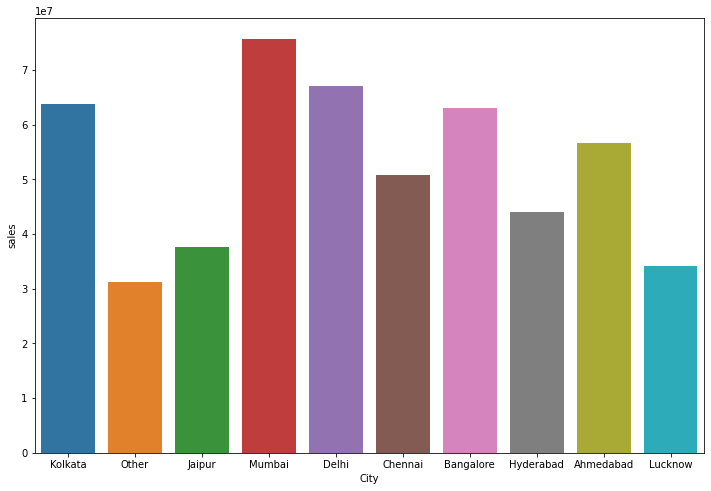

In [69]:
# Creating sales by city dataframe
City_Sales = sales_master.groupby(['city']).sales.sum()
City_Sales_df = pd.DataFrame(City_Sales)

# Add city names
City_Sales_df = City_Sales_df.reset_index()
City_Sales_df = City_Sales_df.merge(city, left_on='city', right_on='city_code')


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 8))

#Plotting the chart
sns.barplot(data=City_Sales_df, x="City", y="sales", ax=ax)

From the above graph we can see that sales is highest for Mumbai city. Some other observations are -

a. Mumbai has highest sales

b. Tier 1 cities have the highest sales — Mumbai, Delhi, Bangalore, Kolkata

c. Among the tier 2 cities Ahmedabad has the highest sales

# 2. Which City has the highest footfall ?


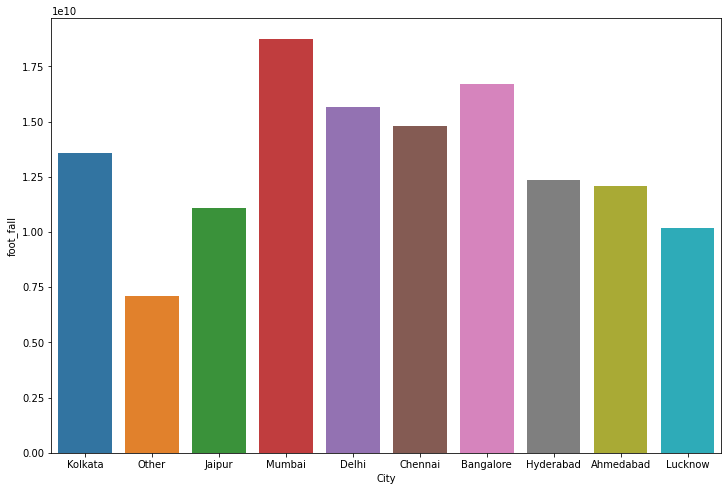

In [70]:
# Creating footfall by city dataframe
City_footfall = sales_master.groupby(['city']).foot_fall.sum()
City_footfall_df = pd.DataFrame(City_footfall)

# Add city names
City_footfall_df = City_footfall_df.reset_index()
City_footfall_df = City_footfall_df.merge(city, left_on='city', right_on='city_code')


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 8))

#Plotting the chart
sns.barplot(data=City_footfall_df, x="City", y="foot_fall", ax=ax)

From the chart we can observe that :

a. Mumbai as expected has the highest footfall

b. One surprising thing is that Bangalore has a higher footfall compared to Kolkata and Delhi but does not have higher sales than then as we saw earlier

# 3. Are sales and footfall correlated?

In [71]:
city_sales_footfall_df = City_Sales_df.merge(City_footfall_df,left_on='city', right_on='city', )
city_sales_footfall_df = city_sales_footfall_df[[ 'sales', 'foot_fall']]
city_sales_footfall_df

,sales,foot_fall
0,6.367215e+07,1.356449e+10
1,3.116922e+07,7.084127e+09
2,3.761170e+07,1.107386e+10
3,7.569806e+07,1.875319e+10
4,6.707669e+07,1.567111e+10
5,5.084272e+07,1.480304e+10
6,6.296178e+07,1.671476e+10
7,4.396180e+07,1.234558e+10
8,5.657841e+07,1.206423e+10
9,3.415553e+07,1.018522e+10


correlation between sales and footfall is 0.9031118721597516


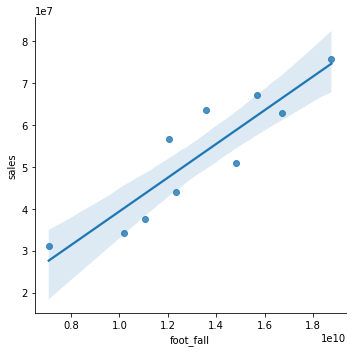

In [72]:
# creating a lineplot with sales and footfall datapoints and printing the correlation
sns.lmplot(data = city_sales_footfall_df, x = 'foot_fall', y = 'sales')
print("correlation between sales and footfall is " + str(city_sales_footfall_df.corr().iloc[0]['foot_fall']))

As we can see that correlation between footfall and sales is very high. In general we can say with certainty that footfall is a very good predictor of sales for a supermarket store.


# 4. Are the sales cyclic in nature?



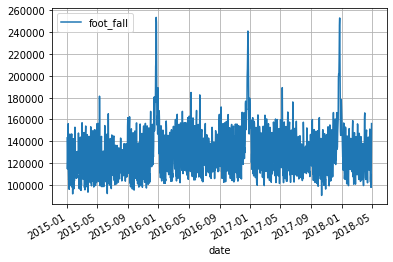

In [73]:
footfall_complete_trend =pd.DataFrame(footfall_pivotdown.groupby(['date']).foot_fall.sum())
footfall_complete_trend.plot(grid = True)

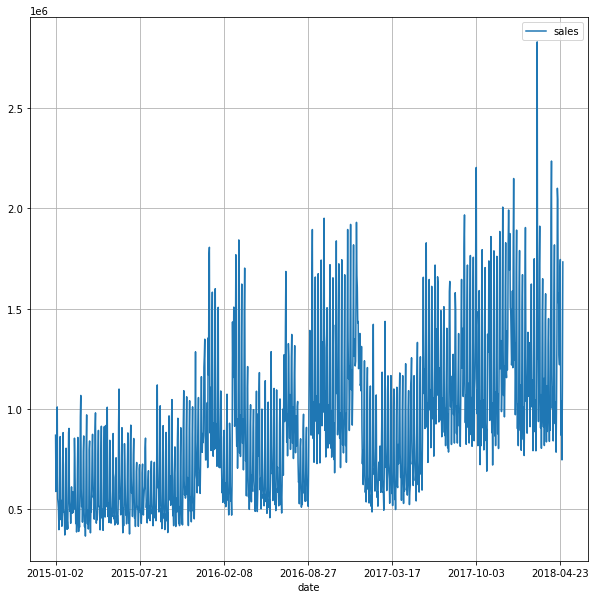

In [74]:
# Plotting sales trend
sales_15_16 = sales_2015.append(sales_2016,ignore_index = True)
sales_15_16_17 = sales_15_16.append(sales_2017,ignore_index = True)
sales_15_16_17_18 = sales_15_16_17.append(sales_2018,ignore_index = True)
sales_complete_trend = pd.DataFrame(sales_15_16_17_18.groupby(['date']).sales.sum())

sales_complete_trend.plot(grid = True, figsize = (10,10))

Following are the observations from the above two graphs:

a. Footfall is generally flat throughout the year with spikes in December/January

b. Sales in general is increasing with time and does see spikes around the end of year which is a festive season